In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [105]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

In [106]:
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [107]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [108]:
df = pd.read_csv('adult.csv')
df = df.drop_duplicates()
df = df[df['native.country'] != '?']
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [109]:
class map_binar(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['income'] = X['income'].map({'<=50K' : 0, '>50K' : 1})
        X['sex'] = X['sex'].map({'Female' : 0, 'Male' : 1})
        return X


In [110]:
from sklearn.pipeline import Pipeline

# Define custom transformer
class ReplaceInterTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['workclass'] = X['workclass'].str.replace('?', 'unemployed')
        X['occupation'] = X['occupation'].str.replace('?', 'no_occupation')
        X['native.country'] = X['native.country'].str.replace('?', 'unknown')
        return X



In [111]:
from sklearn.base import BaseEstimator, TransformerMixin
import category_encoders as ce

class BinaryEncoderTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = ce.BinaryEncoder(cols=['race','workclass','occupation','native.country','relationship','marital.status','education'], return_df = True)
        X = encoder.fit_transform(X)
        return X
encoder = BinaryEncoderTransformer()
df_encoded = encoder.fit_transform(df)
df_encoded

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital.gain,capital.loss,hours.per.week,native.country_0,native.country_1,native.country_2,native.country_3,native.country_4,native.country_5,income
0,90,0,0,0,1,77053,0,0,0,0,...,0,4356,40,0,0,0,0,0,1,<=50K
1,82,0,0,1,0,132870,0,0,0,0,...,0,4356,18,0,0,0,0,0,1,<=50K
2,66,0,0,0,1,186061,0,0,0,1,...,0,4356,40,0,0,0,0,0,1,<=50K
3,54,0,0,1,0,140359,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,<=50K
4,41,0,0,1,0,264663,0,0,0,1,...,0,3900,40,0,0,0,0,0,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,0,1,0,310152,0,0,0,1,...,0,0,40,0,0,0,0,0,1,<=50K
32557,27,0,0,1,0,257302,0,1,1,0,...,0,0,38,0,0,0,0,0,1,<=50K
32558,40,0,0,1,0,154374,0,0,0,0,...,0,0,40,0,0,0,0,0,1,>50K
32559,58,0,0,1,0,151910,0,0,0,0,...,0,0,40,0,0,0,0,0,1,<=50K


In [112]:
class Binary_dummy_Encoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.get_dummies(X, columns=['race','workclass','relationship','marital.status'],drop_first=True)
        encoder = ce.BinaryEncoder(cols=['occupation','native.country','education'], return_df = True)
        X = encoder.fit_transform(X)
        return X


In [113]:
class dummy_Encoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.get_dummies(X, columns=['race','workclass','occupation','native.country','relationship','marital.status','education'],drop_first=True)
        return X

In [114]:
class IsolationForestTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        model=IsolationForest()
        X['outlier']=pd.Series(model.fit_predict(X.values))
        X=X[X.outlier!=-1]
        X.drop(['outlier'], axis=1, inplace=True)
        return X

### Lets create 2 pipelines one for data preprocessing and another for models

In [115]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ReplaceInterTransformer',ReplaceInterTransformer()),('dummy_Encoder',dummy_Encoder()),
                ('map_binar',map_binar()),('IsolationForestTransformer',IsolationForestTransformer())])
df = pipe.fit_transform(df)


In [116]:
df

,age,fnlwgt,education.num,sex,capital.gain,capital.loss,hours.per.week,income,race_Asian-Pac-Islander,race_Black,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,90,77053,9,0,0,4356,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,82,132870,9,0,0,4356,18,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,54,140359,4,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41,264663,10,0,0,3900,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,34,216864,9,0,0,3770,45,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32557,27,257302,12,0,0,0,38,0,0,0,...,0,1,0,0,0,0,0,0,0,0
32558,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,0
32559,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [117]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
X = df.drop('income', axis=1)
Y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state = 12, test_size=0.25)
sm = SMOTENC(random_state=42, categorical_features=[34])
X_res, y_ress = sm.fit_resample(X_train,y_train)
df = pd.concat([X_res, y_ress], axis = 1)



<Axes: ylabel='income'>

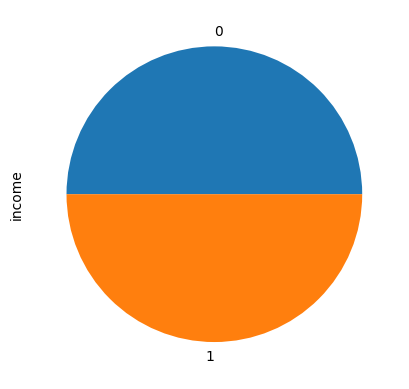

In [118]:
df['income'].value_counts().plot.pie()


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from crucio import SMOTEENN
X = df.drop('income',axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=12)
print(X_train.shape)
print(y_train.shape)

(27192, 99)
(27192,)


In [120]:
pipe2 = Pipeline([('StandardScaler',StandardScaler()),('RandomForestClassifier',RandomForestClassifier())])

In [121]:
pipe2.fit(X_train,y_train)
output = pipe2.predict(X_test)
print(accuracy_score(y_test,output))

0.9018093556928508


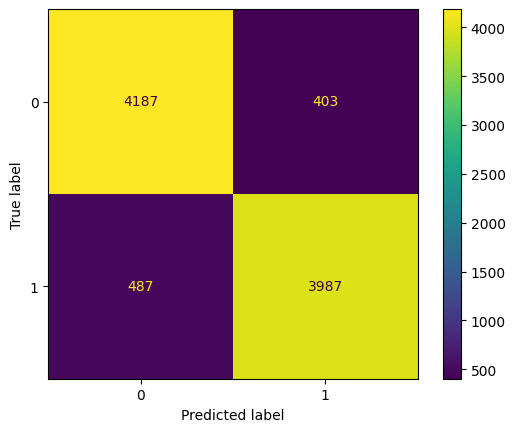

In [122]:
cm = confusion_matrix(y_test, output)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### 0.8702649170586779 - dummy variables PCA-30
#### 0.887800432851122 -BinaryEncoderTransformer PCA-30
#### 0.8837952090183184 - Binary-dummyencoder PCA-40
#### 0.8757020151965642 - dummy variables PCA-90
#### 0.9006442021803767 - dummy_Encoder NO PCA
#### 0.9009345794392524 - Binary_dummy_Encoder NO PCA
#### 0.8945624341015214 - BinaryEncoderTransformer NO PCA

### AS we can see PCA reduces the accuracy of our algorithm so it is not the best idea to use it, it would be if we would need a faster model as an example in medicine but in our case it is not required 

In [124]:
import shap
shap.initjs()
explainer = shap.Explainer(pipe2.predict, X_train,feature_names = list(df.columns)[:-1])

Permutation explainer: 9065it [37:47,  3.98it/s]                                


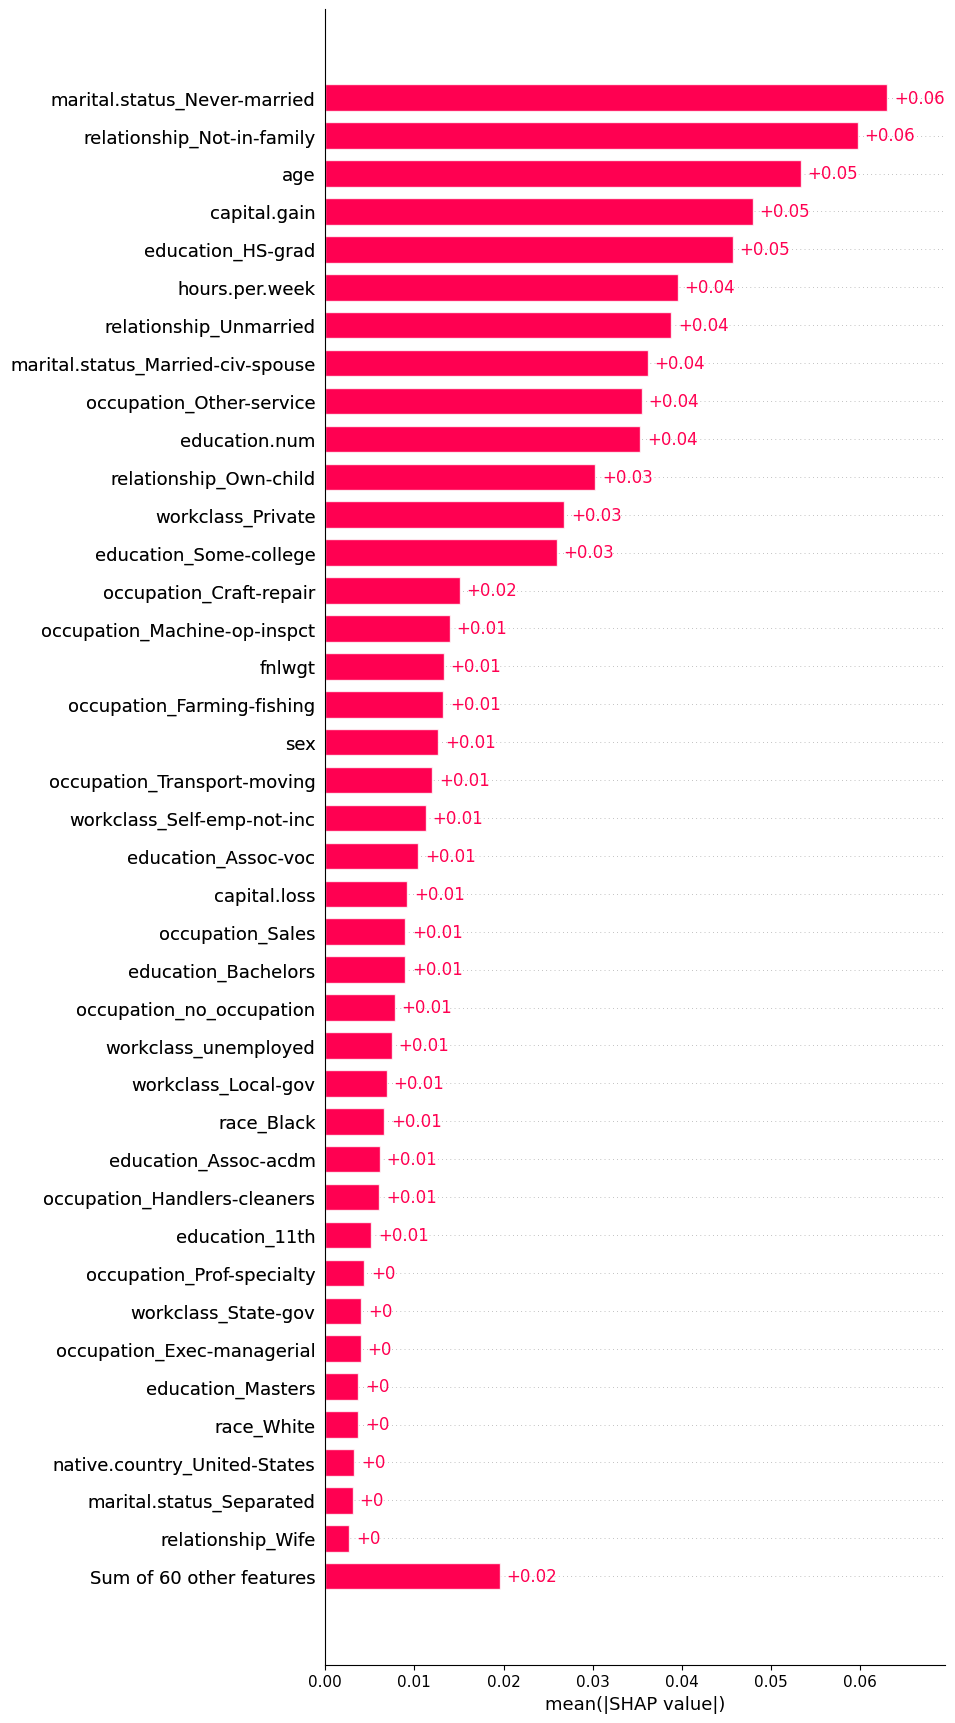

In [125]:
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=40)

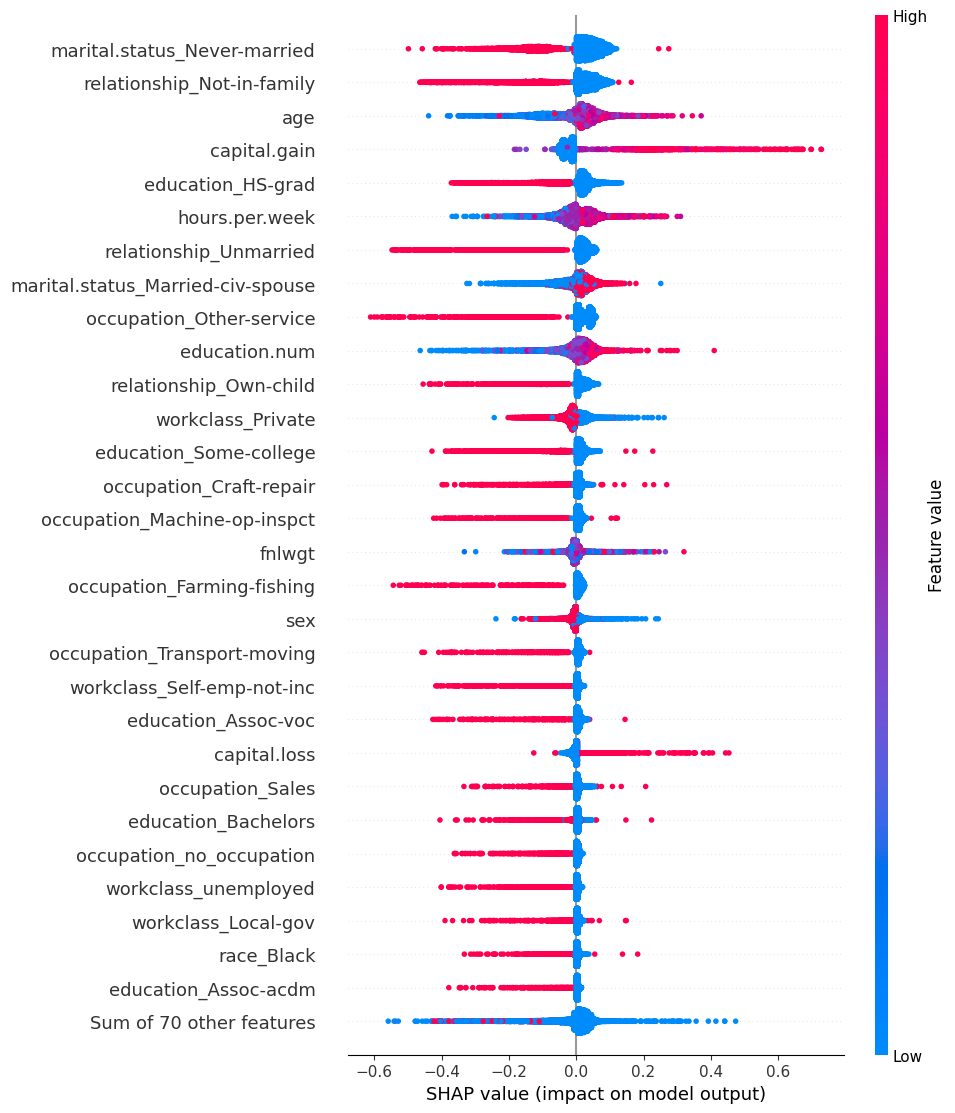

In [126]:
shap.plots.beeswarm(shap_values, max_display=30)

#### According to our shap_beeswarm_plot we can say that a higher capital.gain value leads to a higher income, the same proccess seems to happen for education.num and hours.per.week.